# Table of Contents
#### 01. Import Libraries and Data
#### 02. Exploring relationships
- Correlations
- Correlation matrix heatmap (colored)
- Scatterplot
- Pair plot
- Categorical Plot

#### 03. Exporting Data


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy 

In [4]:
path = r'C:\Users\Goce\Desktop\11-2023 World Happiness Report 2015-2023'

In [5]:
# Importing Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'whr_df_cleaned.csv'), index_col = False)

In [6]:
df.head(3)

Unnamed: 0      country          region  happiness_score  gdp_per_capita  \
0           0  Switzerland  Western Europe            7.587         1.39651   
1           1      Iceland  Western Europe            7.561         1.30232   
2           2      Denmark  Western Europe            7.527         1.32548   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   

   generosity  perceptions_of_corruption  year  
0     0.29678                    0.41978  2015  
1     0.43630                    0.14145  2015  
2     0.34139                    0.48357  2015

In [7]:
df = df.drop(columns=['Unnamed: 0']) #dropping unnecessarry column

In [8]:
df.head(3)

country          region  happiness_score  gdp_per_capita  \
0  Switzerland  Western Europe            7.587         1.39651   
1      Iceland  Western Europe            7.561         1.30232   
2      Denmark  Western Europe            7.527         1.32548   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   

   generosity  perceptions_of_corruption  year  
0     0.29678                    0.41978  2015  
1     0.43630                    0.14145  2015  
2     0.34139                    0.48357  2015

In [9]:
# Find duplicates

df_dups = df[df.duplicated()]

In [10]:
df_dups.shape # No duplicates

(0, 10)

In [11]:
#checking for mixed-type columns
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either

In [12]:
df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
dtype: object

## 02.Exploring Relationship

Columns and meaning:
- country - name of the country
- region - The geographic region to which the country belongs
- happiness_score- The score representing the overall happiness or well-being
- gdp_per_capita- The extent to which GDP contributes to the calculation of the Happiness Score.
- social_support- The extent to which measure of social support contributes to the calculation of the Happiness Score.
- healthy_life_expectancy- The extent to which Life expectancy contributed to the calculation of the Happiness Score
- freedom_to_make_life_choices- The extent to which Freedom contributed to the calculation of the Happiness Score.
- generosity- The extent to which generosity or charitable behavior contributes to the calculation of the Happiness Score.
- perceptions_of_corruption- The extent to which Perception of Corruption contributes to Happiness Score.
- year- year (2015-2023))

### Correlations:

In [13]:
# Create a correlation matrix using pandas

df.corr()

happiness_score  gdp_per_capita  social_support  \
happiness_score                      1.000000        0.723810        0.648155   
gdp_per_capita                       0.723810        1.000000        0.522092   
social_support                       0.648155        0.522092        1.000000   
healthy_life_expectancy              0.682349        0.564934        0.561133   
freedom_to_make_life_choices         0.569458        0.439453        0.364927   
generosity                           0.082345       -0.153904       -0.006385   
perceptions_of_corruption            0.415711        0.339392        0.146410   
year                                 0.061835        0.327064        0.020381   

                              healthy_life_expectancy  \
happiness_score                              0.682349   
gdp_per_capita                               0.564934   
social_support                               0.561133   
healthy_life_expectancy                      1.000000   
freedom_to_make_life_choices                 0.261372   
generosity                                   0.025935   
perceptions_of_corruption                    0.256354   
year                                        -0.150133   

                              freedom_to_make_life_choices  generosity  \
happiness_score                                   0.569458    0.082345   
gdp_per_capita                                    0.439453   -0.153904   
social_support                                    0.364927   -0.006385   
healthy_life_expectancy                           0.261372    0.025935   
freedom_to_make_life_choices                      1.000000    0.157050   
generosity                                        0.157050    1.000000   
perceptions_of_corruption                         0.432311    0.224131   
year                                              0.288639   -0.290562   

                              perceptions_of_corruption      year  
happiness_score                                0.415711  0.061835  
gdp_per_capita                                 0.339392  0.327064  
social_support                                 0.146410  0.020381  
healthy_life_expectancy                        0.256354 -0.150133  
freedom_to_make_life_choices                   0.432311  0.288639  
generosity                                     0.224131 -0.290562  
perceptions_of_corruption                      1.000000  0.036125  
year                                           0.036125  1.000000

### Correlation matrix heatmap (colored)

In [14]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [16]:
# Create a subset excluding the "country" and "country" columns

sub = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'year']]

In [17]:
sub

happiness_score  gdp_per_capita  social_support  \
0               7.587         1.39651         1.34951   
1               7.561         1.30232         1.40223   
2               7.527         1.32548         1.36058   
3               7.522         1.45900         1.33095   
4               7.427         1.32629         1.32261   
...               ...             ...             ...   
1362            3.207         0.53100         0.78400   
1363            3.204         0.75800         0.88100   
1364            3.138         0.67000         0.54000   
1365            2.392         1.41700         0.47600   
1366            1.859         0.64500         0.00000   

      healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
0                     0.94143                       0.66557     0.29678   
1                     0.94784                       0.62877     0.43630   
2                     0.87464                       0.64938     0.34139   
3                     0.88521                       0.66973     0.34699   
4                     0.90563                       0.63297     0.45811   
...                       ...                           ...         ...   
1362                  0.10500                       0.37500     0.18300   
1363                  0.06900                       0.36300     0.11200   
1364                  0.09200                       0.37100     0.19300   
1365                  0.39800                       0.12300     0.06100   
1366                  0.08700                       0.00000     0.09300   

      perceptions_of_corruption  year  
0                       0.41978  2015  
1                       0.14145  2015  
2                       0.48357  2015  
3                       0.36503  2015  
4                       0.32957  2015  
...                         ...   ...  
1362                    0.06800  2023  
1363                    0.11700  2023  
1364                    0.05100  2023  
1365                    0.02700  2023  
1366                    0.05900  2023  

[1367 rows x 8 columns]

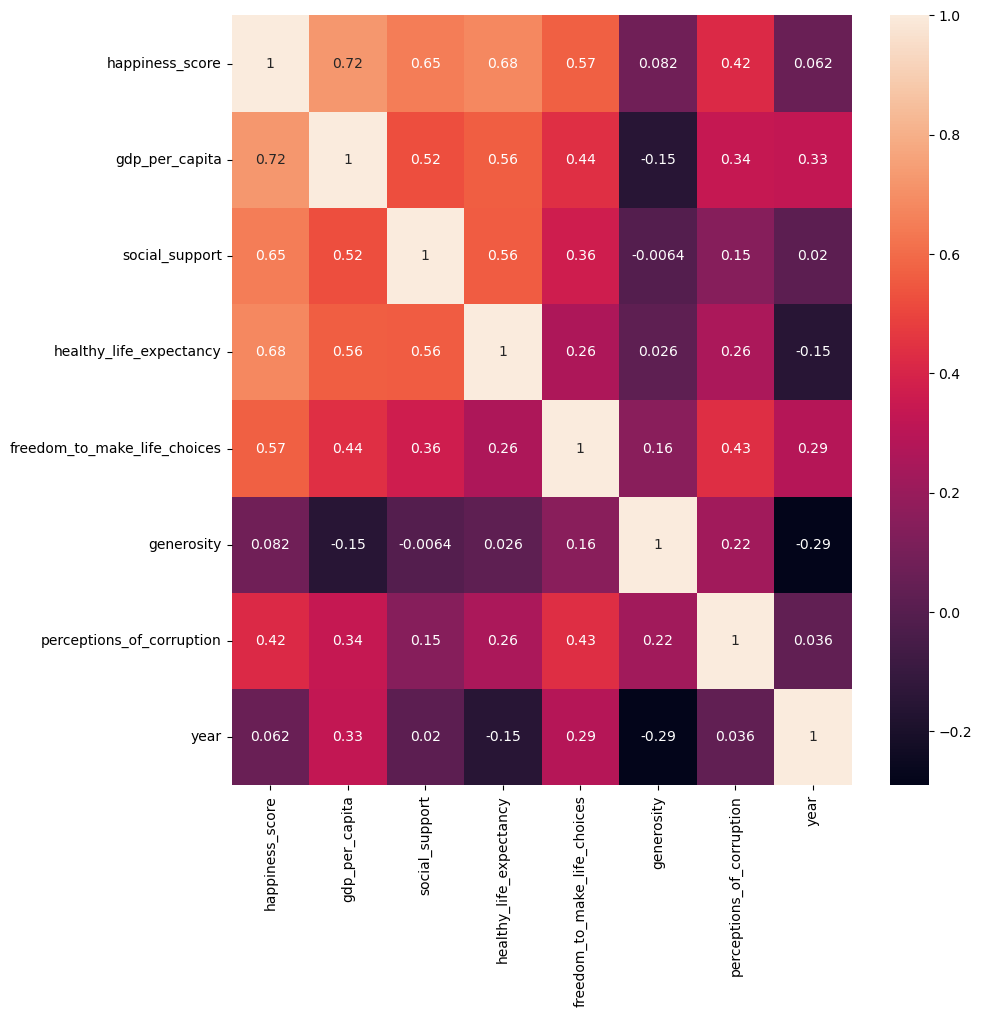

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

- Relationships between the variables

Happiness Score has strong positive correlations with economic factors (GDP per capita), social support, health, and freedom. It also has a moderate positive correlation with perceptions of corruption.

GDP per Capita is strongly positively correlated with Happiness Score and perceptions of corruption, and moderately correlated with social support and health. It has a weak negative correlation with generosity.

Social Support is moderately positively correlated with Happiness Score and health, with weak positive correlations with other variables and a weak negative correlation with generosity.

Healthy Life Expectancy has a moderate positive correlation with Happiness Score and perceptions of corruption, while it is weakly correlated with other variables.

Freedom to Make Life Choices is moderately positively correlated with Happiness Score, perceptions of corruption, and the year, and has weak correlations with other factors.

Generosity has weak correlations with all variables, except for a moderate positive correlation with perceptions of corruption.

Perceptions of Corruption are moderately positively correlated with Happiness Score, GDP per capita, and other factors, and moderately positively correlated with generosity.

### Scatterplots 

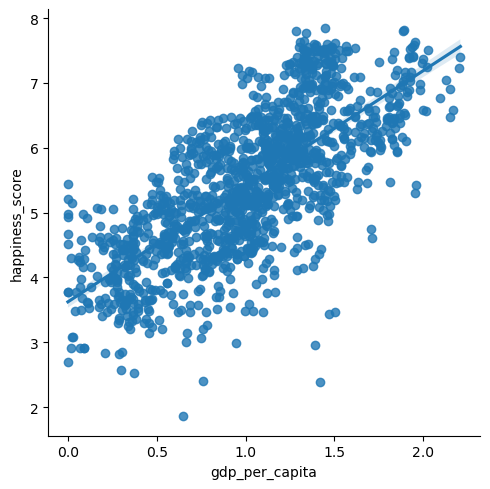

In [20]:
# Create a scatterplot for the "happiness_score" and "gdp_per_capita" columns in seaborn

sns.lmplot(x = 'gdp_per_capita', y = 'happiness_score', data = df)

 The scatterplot show how economic factors (GDP per capita) affect happiness. There is a significant positive relationship between economic prosperity and happiness.

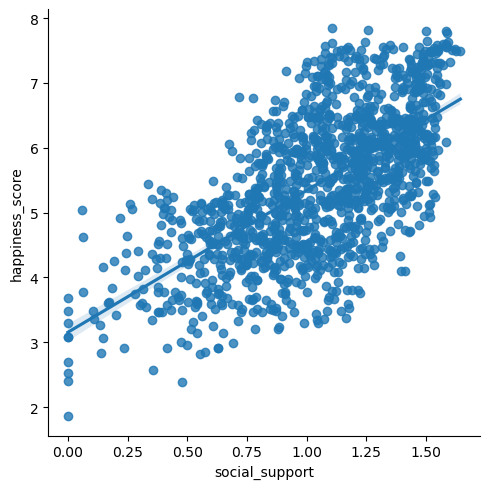

In [21]:
# Create a scatterplot for the "happiness_score" and "social_support" columns in seaborn

sns.lmplot(x = 'social_support', y = 'happiness_score', data = df)

There is a strong positive correlation between happiness score and social support. This indicates that as social support increases, happiness score tends to increase.

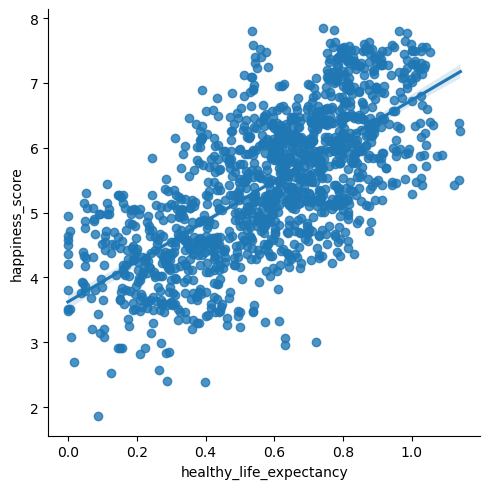

In [23]:
# Create a scatterplot for the "happiness_score" and "healthy_life_expectancy" columns in seaborn

sns.lmplot(x = 'healthy_life_expectancy', y = 'happiness_score', data = df)

Strong positive correlation between happiness score and healthy life expectancy. This implies that countries with higher life expectancies tend to have higher happiness scores. Good health contributes significantly to overall happiness.

###  Pair plot

In [26]:
# Keep only the variables to use in the pair plot

sub_2 = sub[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]

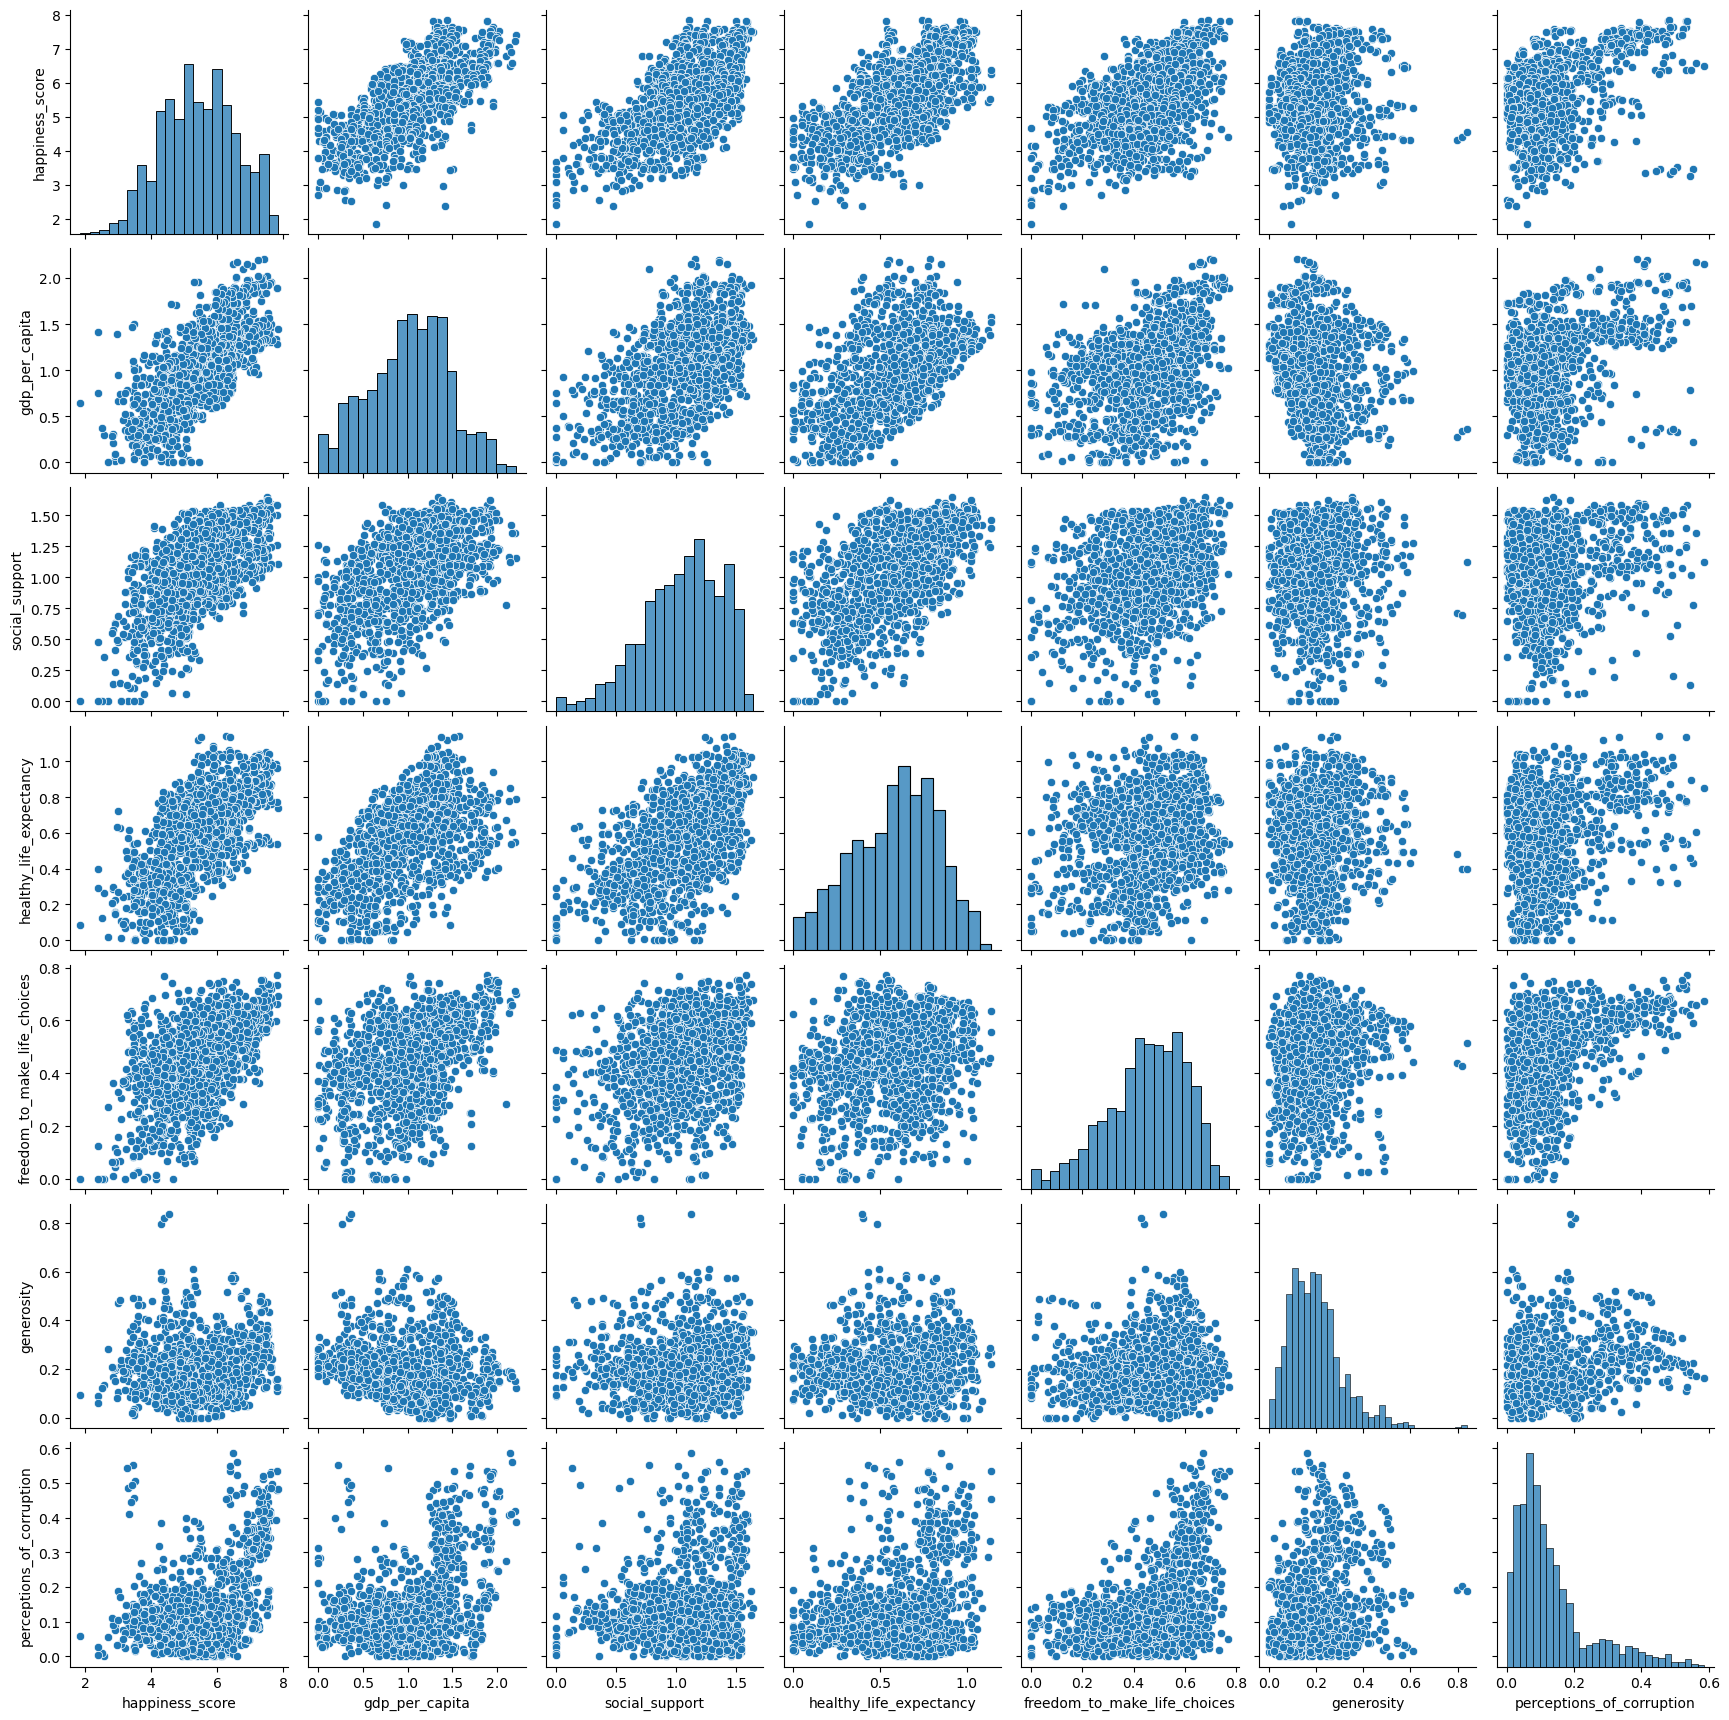

In [28]:
# Create a pair plot 

g = sns.pairplot(sub_2)

It seems that variable least explaining the happiness score are generosity and perception of corruption. From the other hand, variables like GDP Per Capita, social_support, healthy_life_expectancy and freedom_to_make_life_choices are showing strong positive correlation with happiness score.

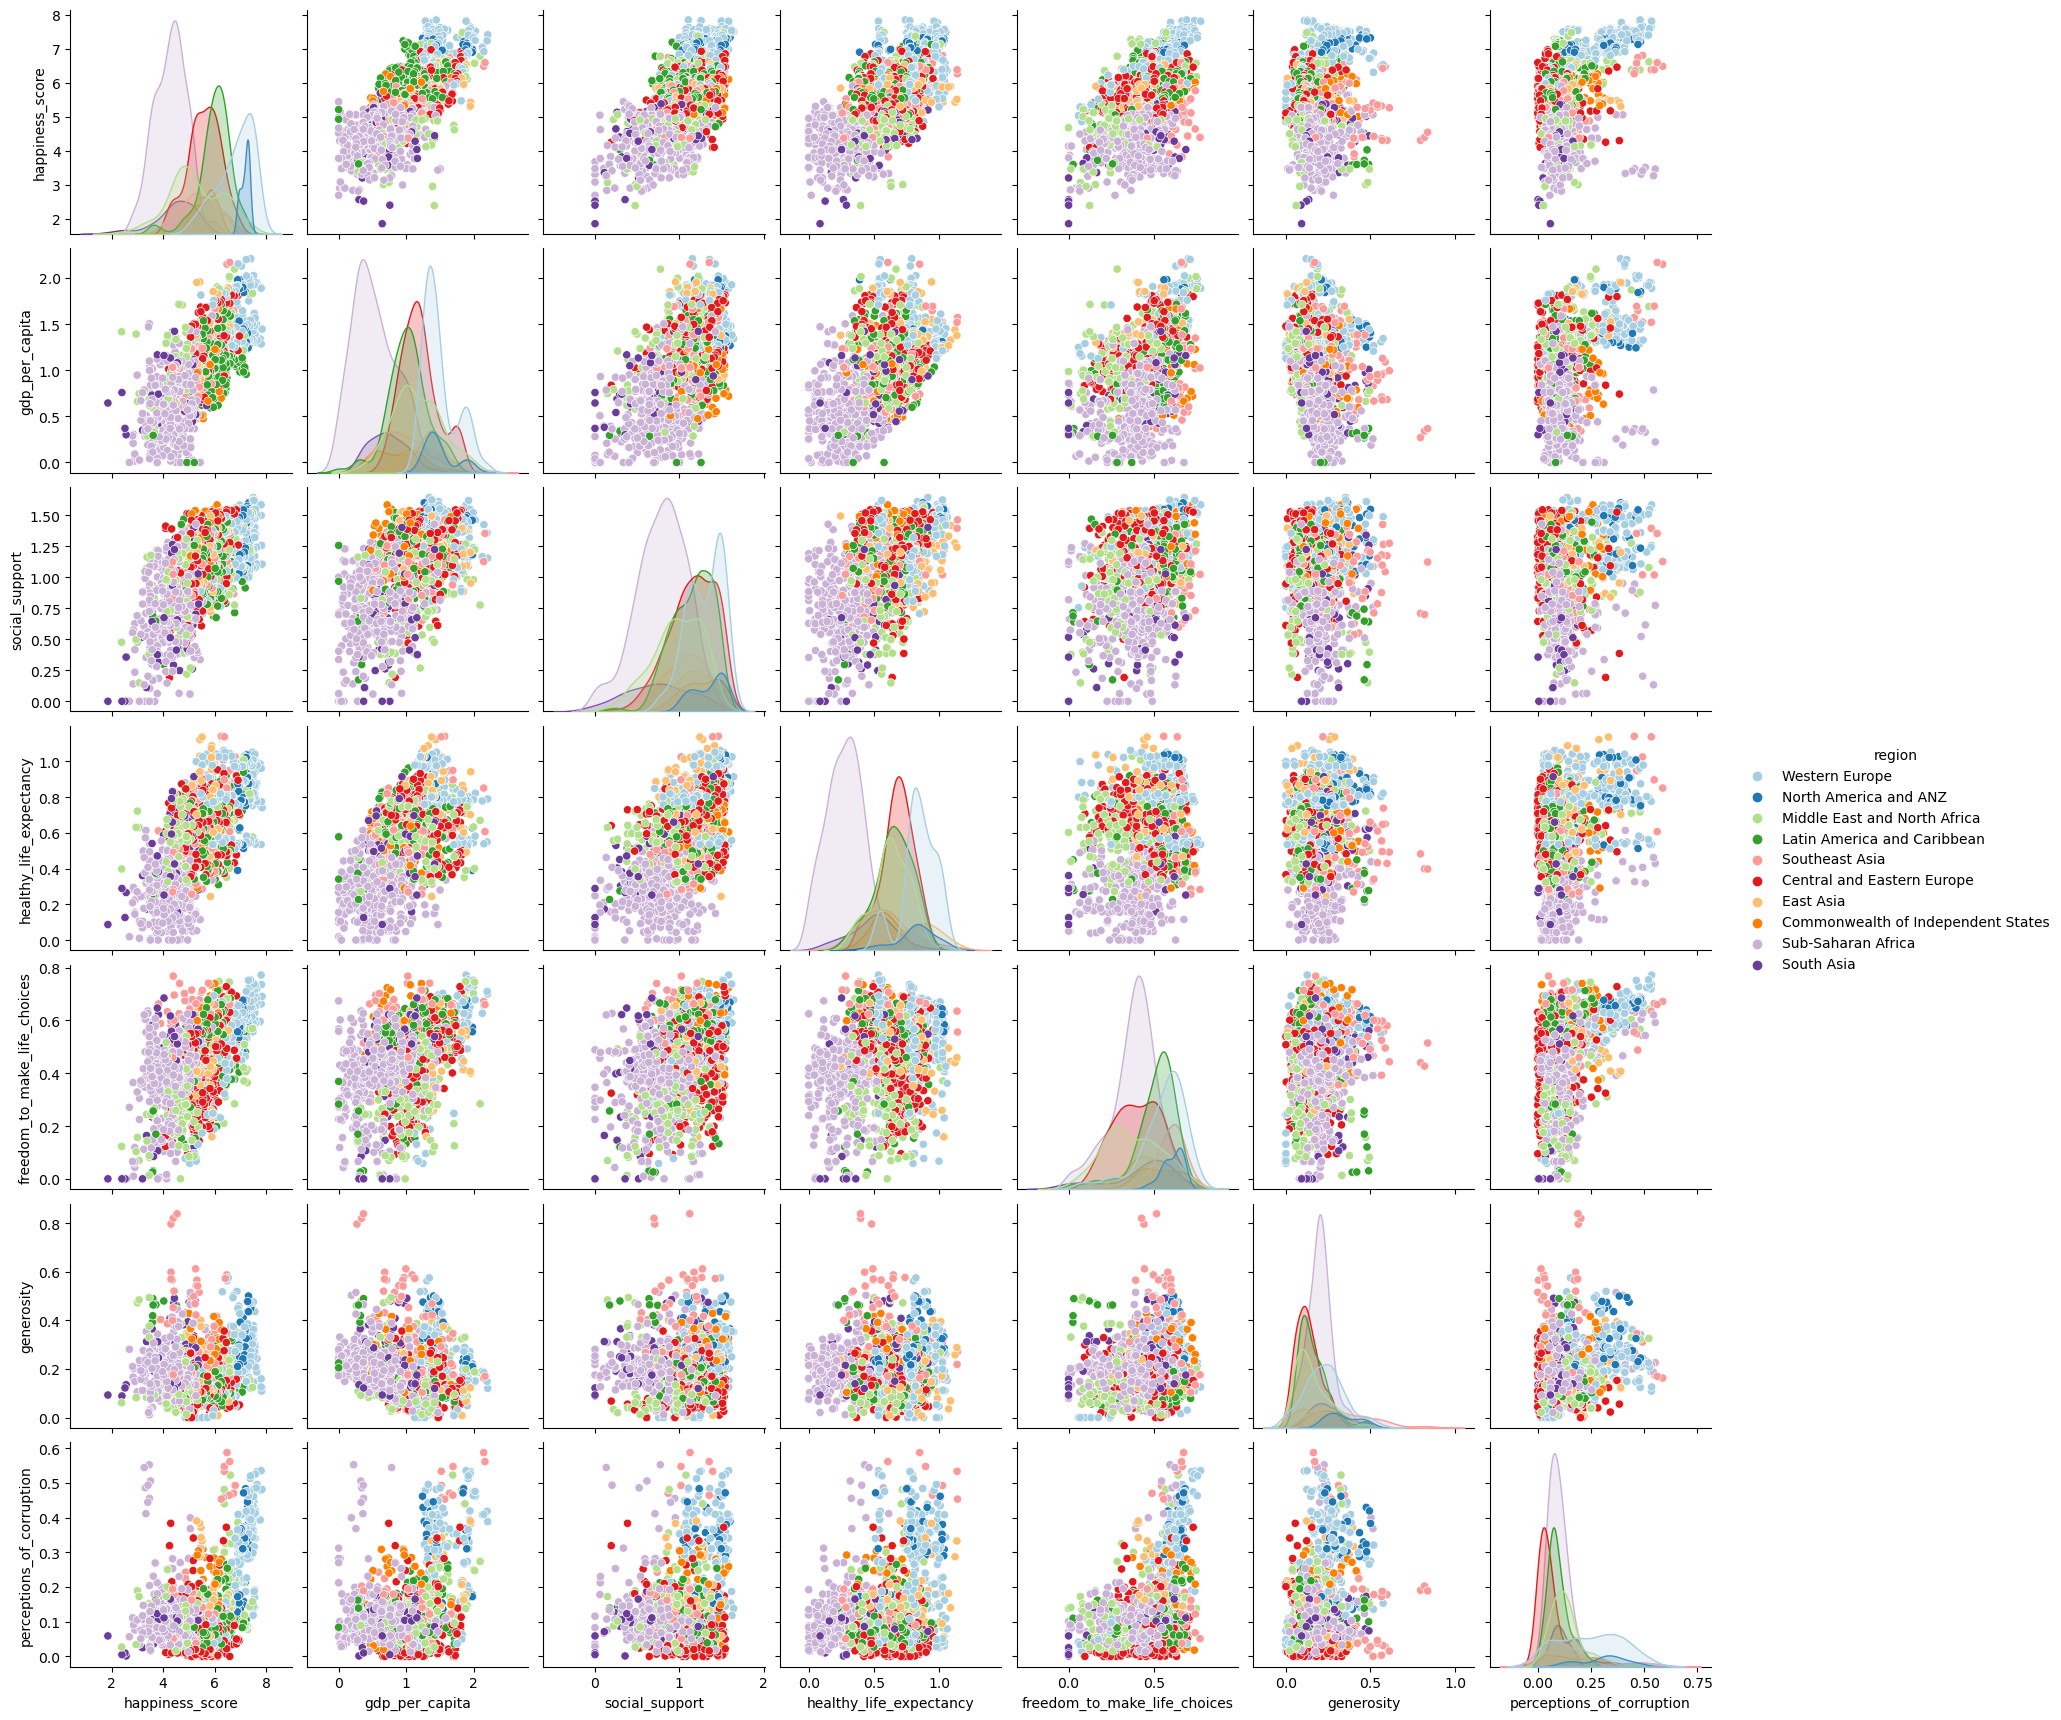

In [29]:
# pair plots with 'region' included
columns = ['region','happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
sns.pairplot(df[columns], hue="region", palette="Paired")

It seems that countries from Western Europe and NOrth America and ANZ have the highest values for happiness score; Sub-Saharan Africa have the lowest values.

### Categorical Plot

<AxesSubplot:xlabel='happiness_score', ylabel='Count'>

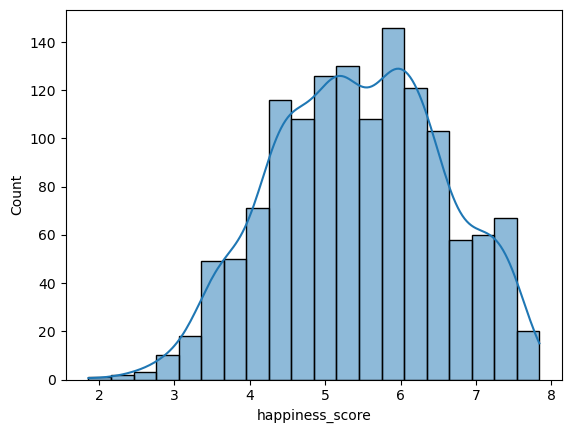

In [30]:
#Creating a categorical variable that splits the "happiness_score" column into categories
sns.histplot(df['happiness_score'], bins = 20, kde = True)

In [31]:
df.loc[df['happiness_score'] < 3.5, 'happiness_rank'] = 'Very Low Happiness'

In [33]:
df.loc[(df['happiness_score'] >= 3.5) & (df['happiness_score'] < 5), 'happiness_rank'] = 'Low Happiness'

In [34]:
df.loc[(df['happiness_score'] >= 5) & (df['happiness_score'] < 6.5), 'happiness_rank'] = 'Moderate Happiness'

In [35]:
df.loc[df['happiness_score'] >= 6.5, 'happiness_rank'] = 'High Happiness'

In [36]:
df['happiness_rank'].value_counts(dropna = False)

Moderate Happiness    649
Low Happiness         428
High Happiness        234
Very Low Happiness     56
Name: happiness_rank, dtype: int64

In [37]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year', 'happiness_rank'],
      dtype='object')

In [42]:
# Check for missing values

df.isnull().sum() 

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
happiness_rank                  0
dtype: int64

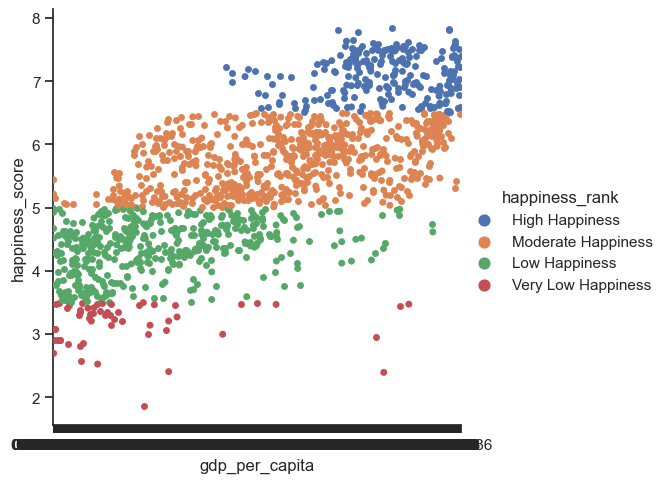

In [45]:
# Create a categorical plot in seaborn using the happiness_rank created above

sns.set(style="ticks")
g = sns.catplot(x="gdp_per_capita", y="happiness_score", hue="happiness_rank", data=df)

In [46]:
# fig = g.get_figure()
g.savefig("out.png") 

Questions to explore:
1. Regional Happiness Trends:
- How does happiness score vary across different geographic regions?
- Are there regions consistently scoring higher in happiness?
- Are there big differences between the countries within the regions?
2. Determinants of Happiness:
- What are the main factors (e.g., gdp_per_capita, social_support, 
healthy_life_expectancy) contributing to happiness across countries?
- Do these factors show consistent importance over the years (year)?
- What is the impact of every variable on the happiness score?
3. Time-Based Analysis:
- How has global happiness evolved from 2015 to 2023? Are there any significant 
trends or changes over time?
- Which countries have the biggest improvements/decline during the years?

Based on the exploration we’ve conducted so far we can say that the main factors contributing to happiness across countries are gdp_per_capita, social_support and 
healthy_life_expectancy 

Hypotheses:

Economic Hypotheses:
Null Hypothesis: There is no significant relationship between GDP per capita and happiness score.
Alternative Hypothesis: Higher GDP per capita is associated with higher happiness scores.

Regional Hypotheses:
Null Hypothesis: There are no significant differences in happiness scores across geographic regions.
Alternative Hypothesis: Some regions exhibit consistently higher happiness scores than others.

Temporal Hypotheses:
Null Hypothesis: Happiness scores have remained constant over the years.
Alternative Hypothesis: Happiness scores have changed significantly over time.

Cultural Hypotheses:
Null Hypothesis: Cultural and societal factors have no impact on happiness scores.
Alternative Hypothesis: Cultural and societal values influence happiness levels.

In [47]:
#Exporting df
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df.csv'))